In [36]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

In [37]:
img = plt.imread('lenna.png')

In [38]:
imGray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [39]:
smoothingMask = np.ones((5,5))/225

In [40]:
imgblur = signal.convolve2d(imGray,smoothingMask,boundary='symm',mode='same')

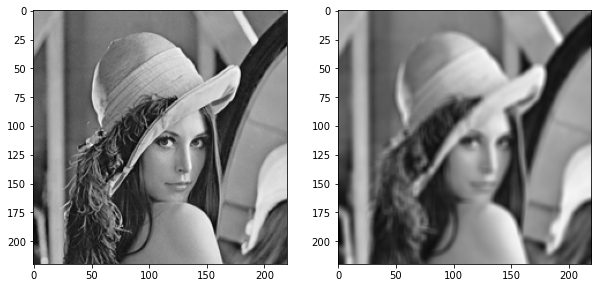

In [41]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imGray,cmap='gray')
ax2.imshow(imgblur,cmap='gray')

In [42]:
xMask = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
yMask = xMask.T.copy()

In [43]:
fx = signal.convolve2d(imGray,xMask,boundary='symm',mode='same')
fy = signal.convolve2d(imGray,yMask,boundary='symm',mode='same')


In [44]:
Gm = (fx**2 + fy**2)**0.5 

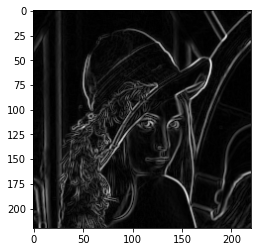

In [45]:
plt.imshow(Gm,cmap='gray')

In [46]:
th = Gm.max()-4*Gm.std()

In [47]:
th

1.2593248281705423

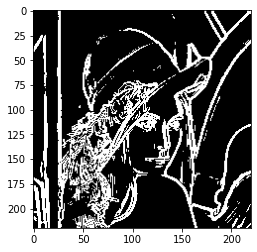

In [48]:
E = Gm>0.3
plt.imshow(E,cmap='gray')

In [49]:
imsharp = imgblur + 0.5*Gm

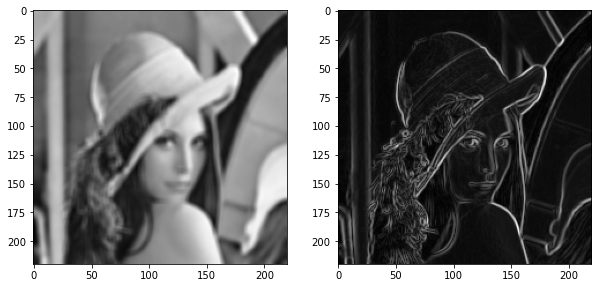

In [50]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imgblur,cmap='gray')
ax2.imshow(imsharp,cmap='gray')